# Importing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading and resizing

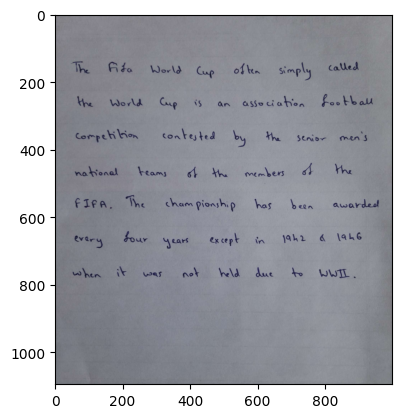

In [ ]:
img = cv2.imread('/content/word-segmentation.JPEG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:

    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)

    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img);

# Preprocessing

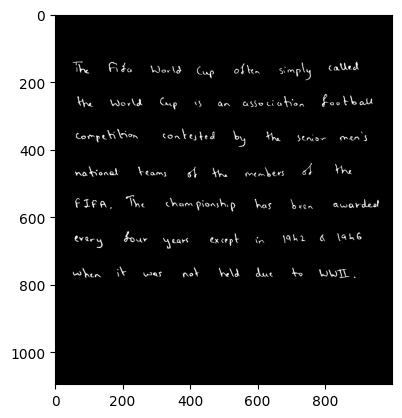

In [ ]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);

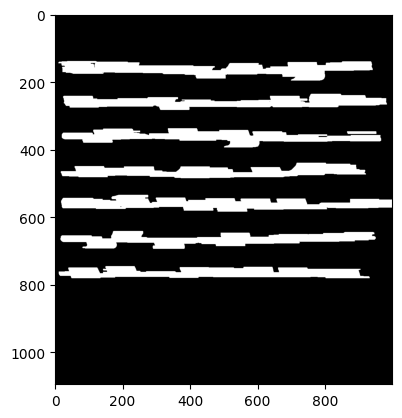

In [ ]:
#dilation
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

In [ ]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

# Line segmentation

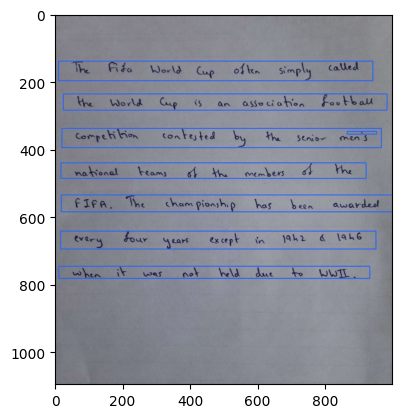

In [ ]:
img2 = img.copy()

for ctr in sorted_contours_lines:

    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)

plt.imshow(img2);

In [ ]:
img2 = img.copy()

# List to store the coordinates of each line
lines_list = []

for ctr in sorted_contours_lines:
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)

    # Add the coordinates to the list
    lines_list.append([x, y, x+w, y+h])

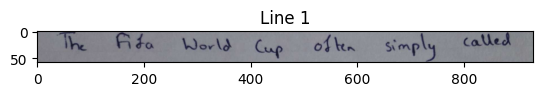

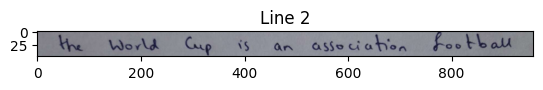

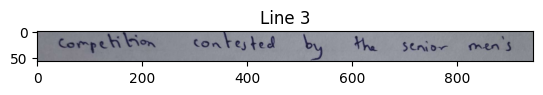

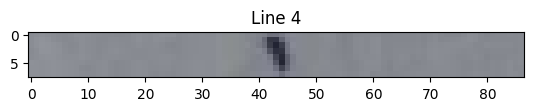

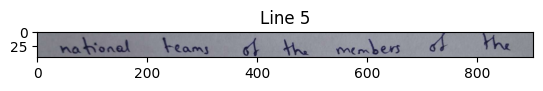

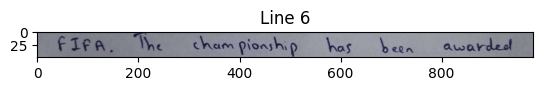

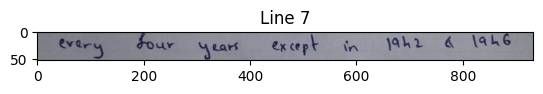

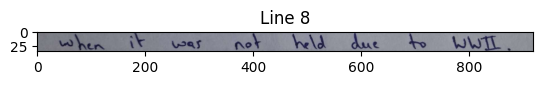

In [ ]:
for i, line in enumerate(lines_list):
    # Crop each line and convert it to an image
    line_image = img[line[1]:line[3], line[0]:line[2]]

    # Display the image
    plt.figure()
    plt.imshow(line_image, cmap='gray')
    plt.title(f'Line {i+1}')
    plt.show()

# Text segmentation

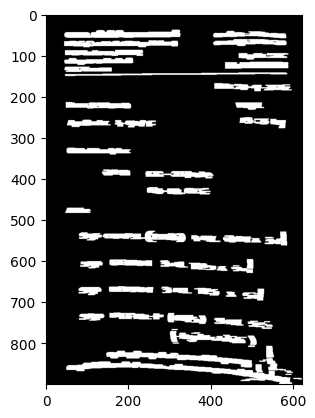

In [ ]:
#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

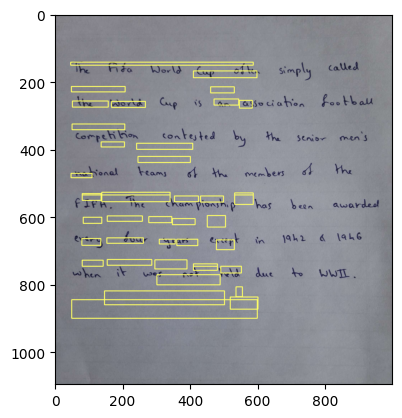

In [ ]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:

    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]

    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])

    for word in sorted_contour_words:

        if cv2.contourArea(word) < 400:
            continue

        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)

plt.imshow(img3);

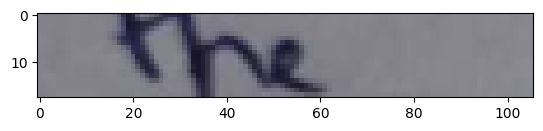

In [ ]:
ninth_word = words_list[8]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

In [ ]:
print(words_list)

[[29, 30, 62, 56], [0, 121, 91, 150], [15, 167, 80, 194], [21, 85, 82, 103], [29, 30, 90, 56], [92, 72, 137, 123], [96, 162, 142, 210], [111, 125, 173, 152], [119, 31, 193, 59], [159, 79, 230, 107], [178, 173, 377, 210], [193, 124, 229, 155], [207, 33, 331, 60], [250, 126, 307, 150], [259, 84, 318, 105], [300, 135, 372, 152], [650, 143, 741, 159], [658, 86, 866, 129], [667, 45, 719, 66], [714, 176, 771, 218], [739, 46, 868, 68], [770, 125, 825, 164], [789, 182, 832, 213], [827, 129, 859, 162], [870, 131, 929, 163], [889, 36, 921, 68], [893, 90, 941, 125], [0, 121, 91, 150], [15, 167, 80, 194], [21, 85, 82, 103], [92, 72, 137, 123], [96, 162, 142, 210], [111, 125, 173, 152], [159, 79, 230, 107], [178, 173, 377, 210], [193, 124, 229, 155], [250, 126, 307, 150], [259, 84, 318, 105], [300, 135, 372, 152], [650, 143, 741, 159], [658, 86, 866, 129], [714, 176, 771, 218], [770, 125, 825, 164], [789, 182, 832, 213], [827, 129, 859, 162], [870, 131, 929, 163], [893, 90, 941, 125], [672, 143, 74

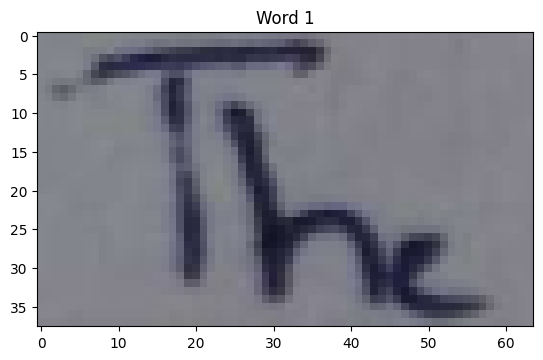

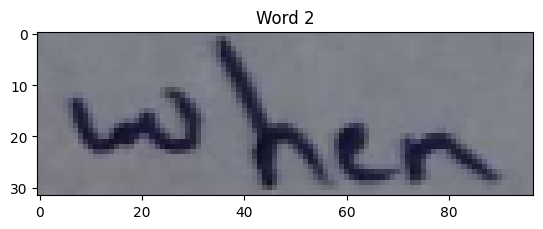

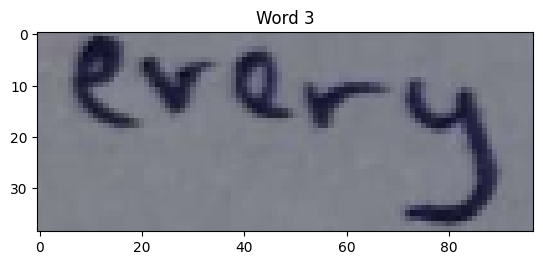

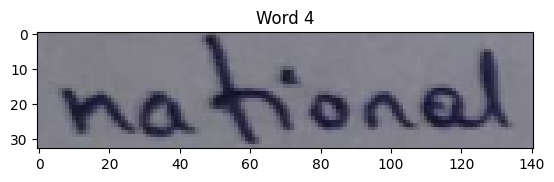

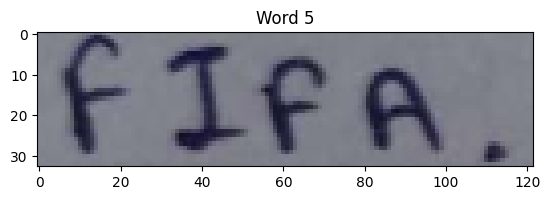

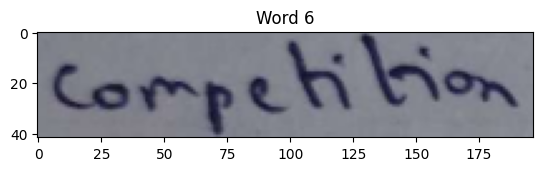

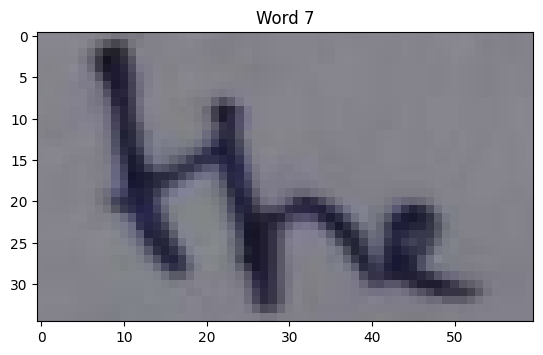

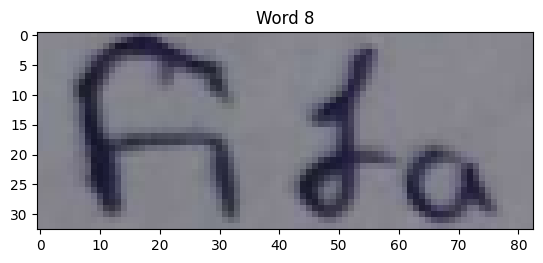

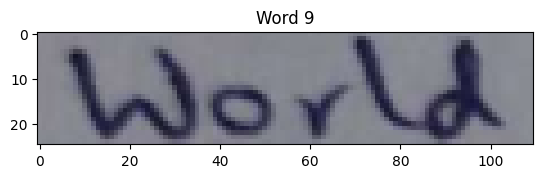

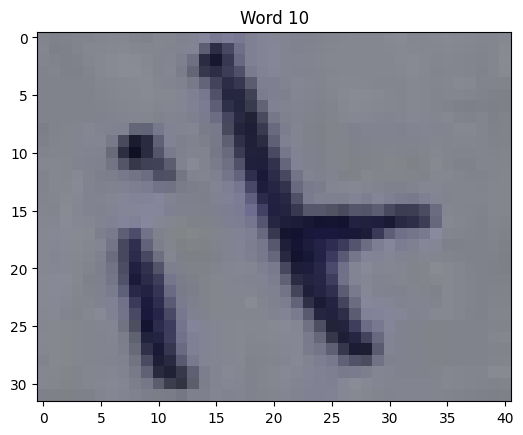

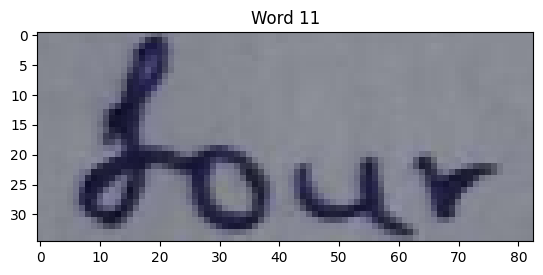

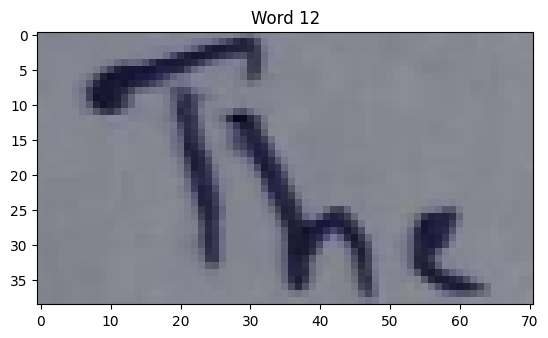

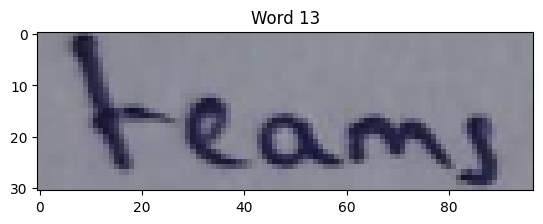

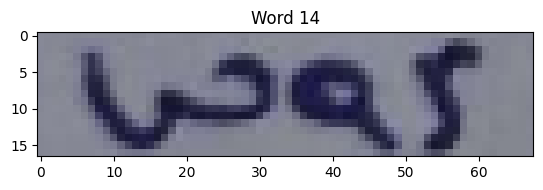

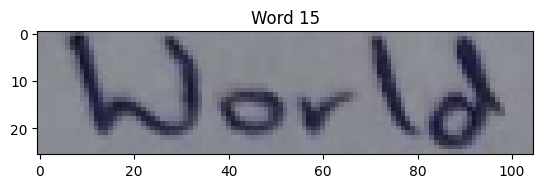

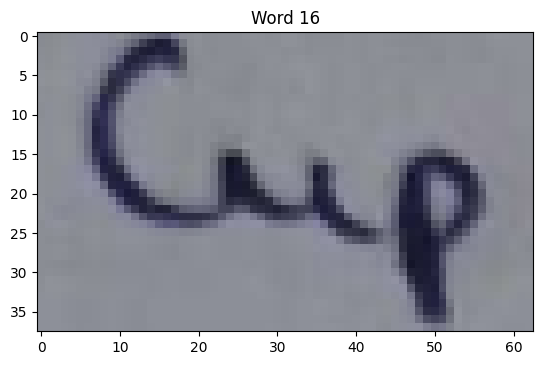

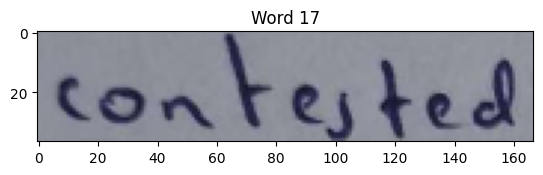

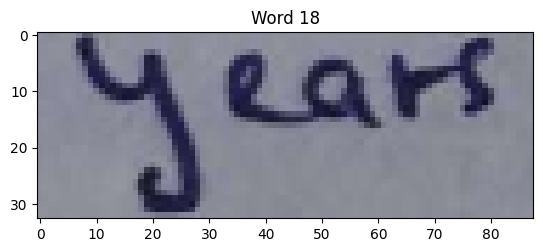

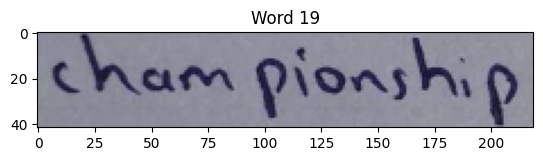

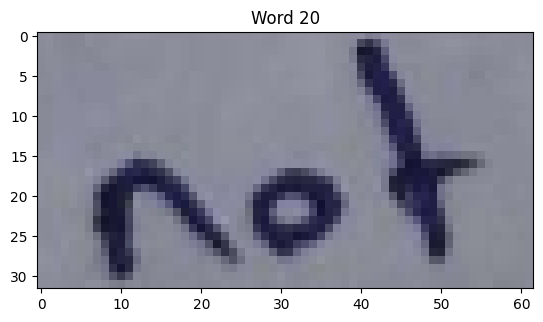

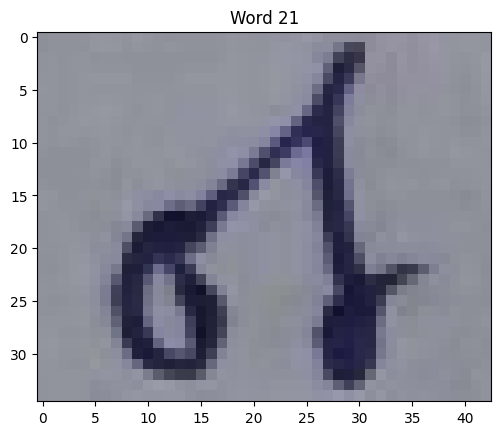

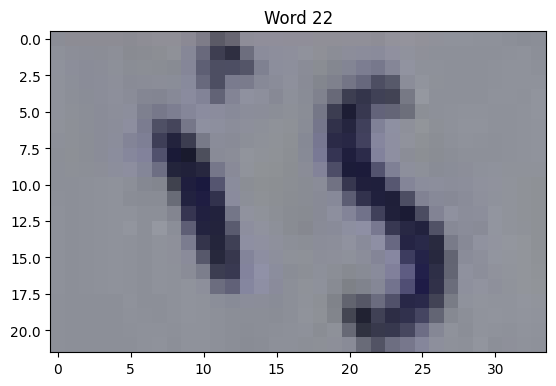

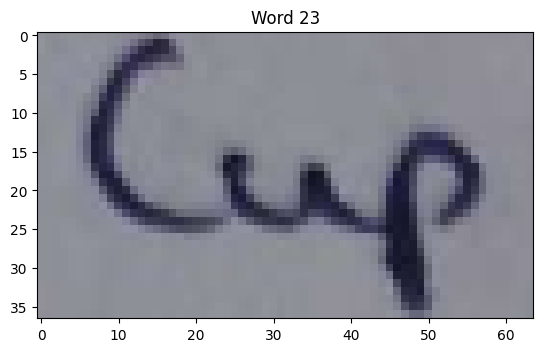

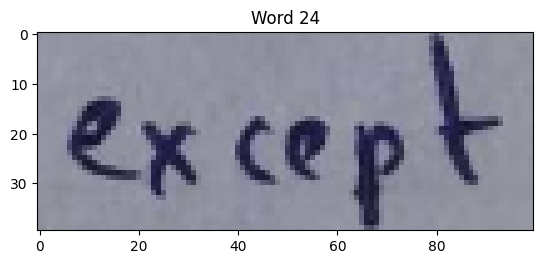

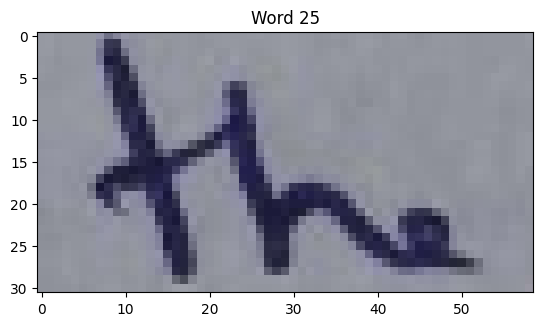

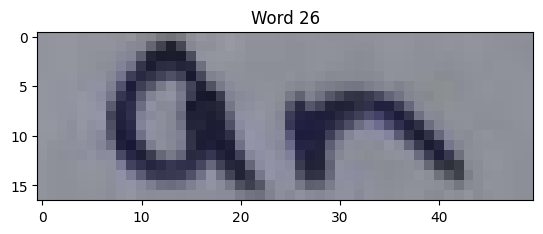

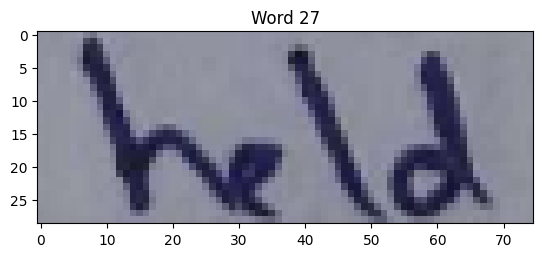

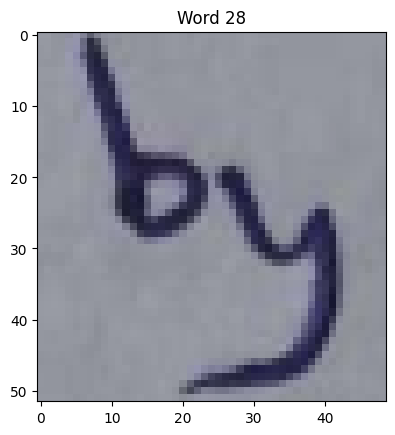

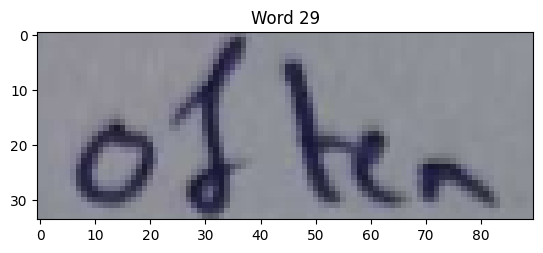

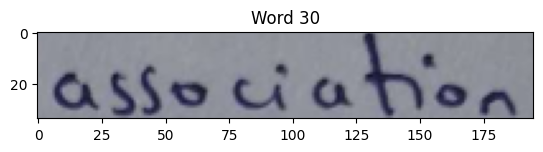

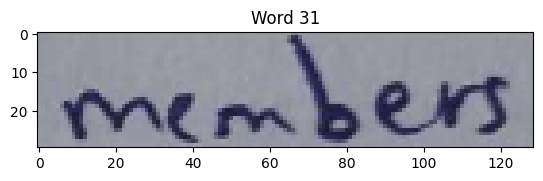

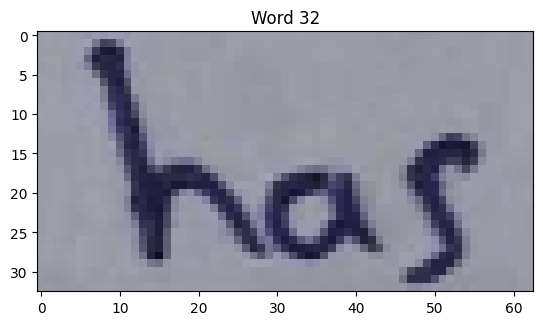

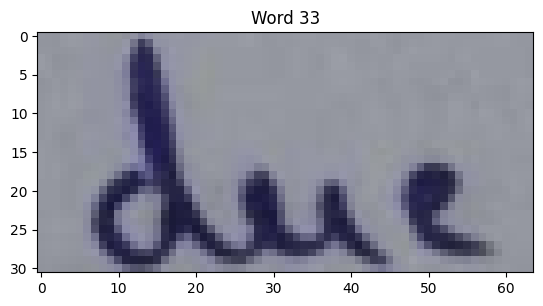

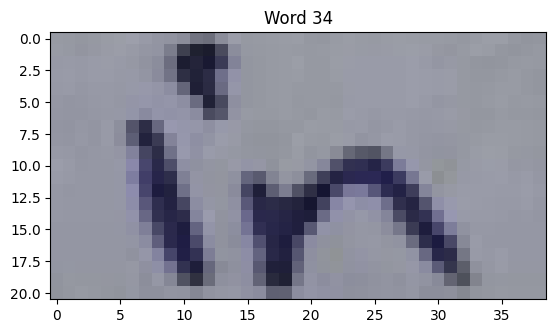

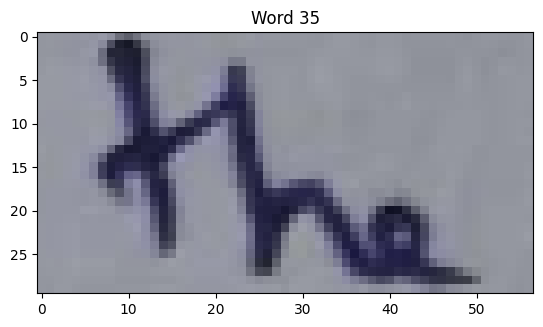

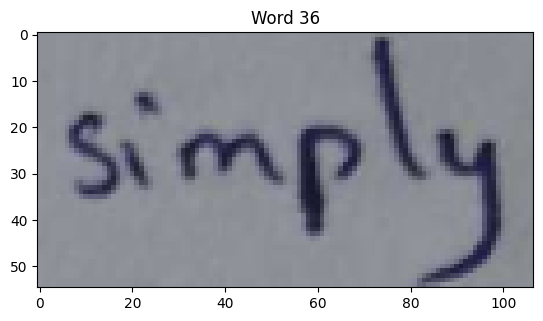

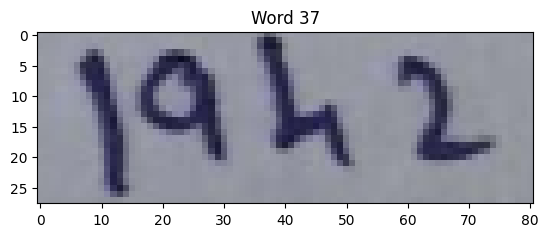

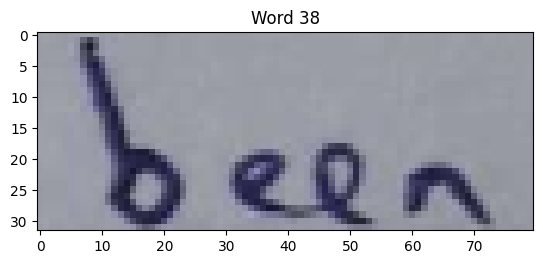

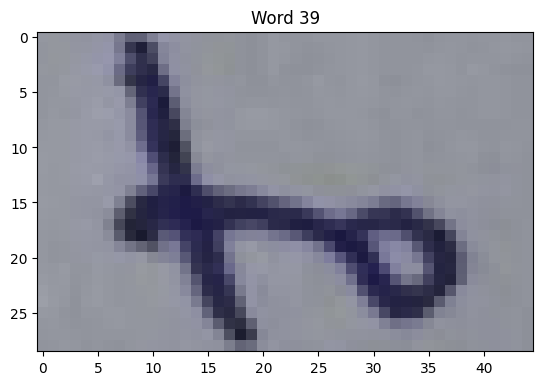

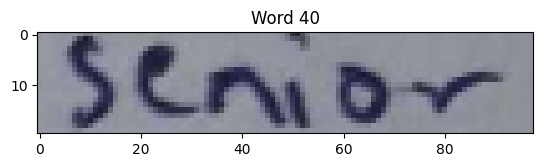

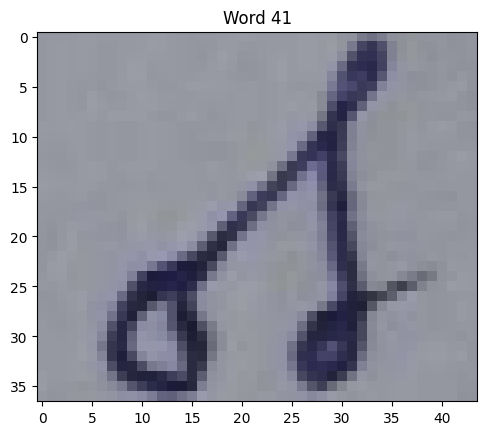

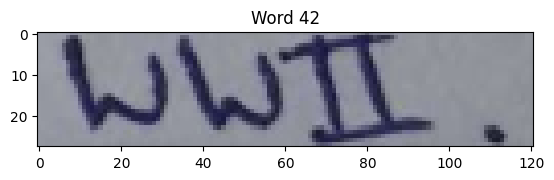

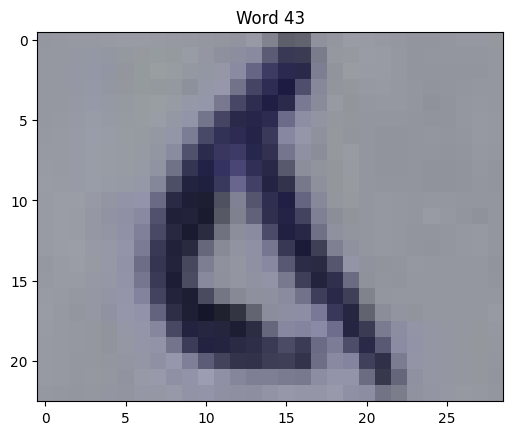

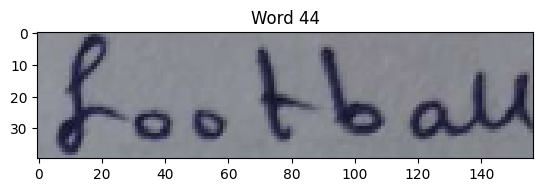

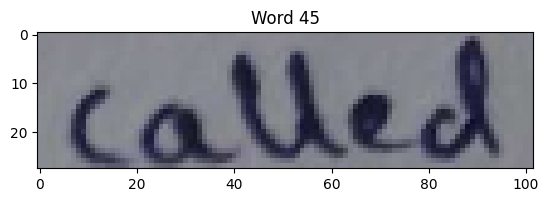

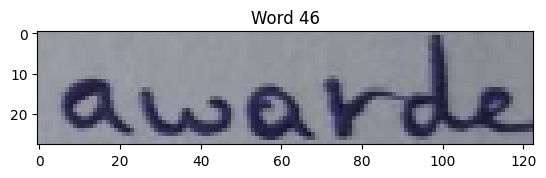

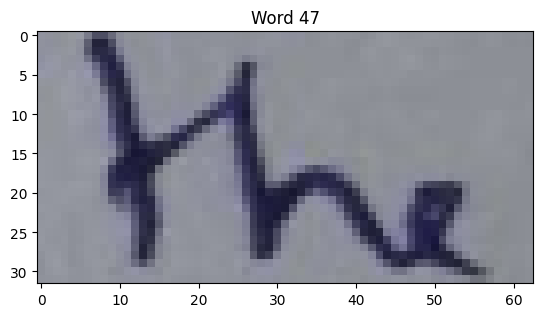

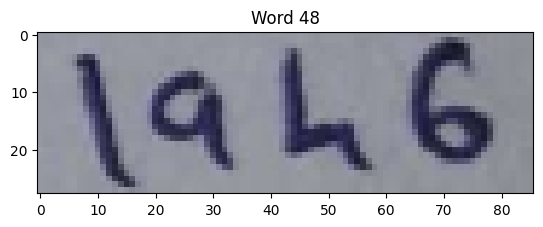

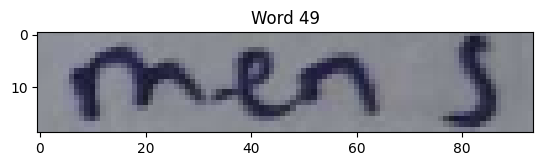

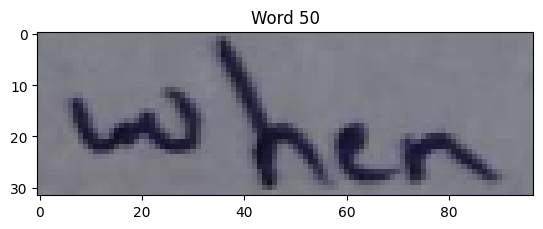

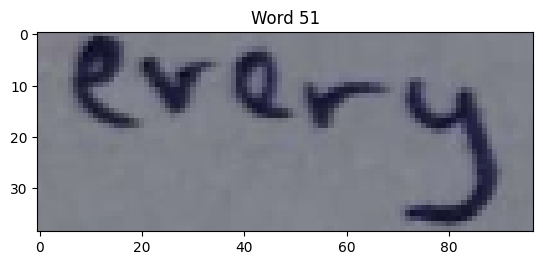

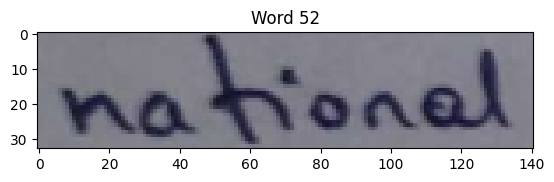

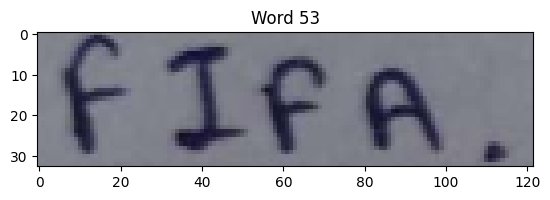

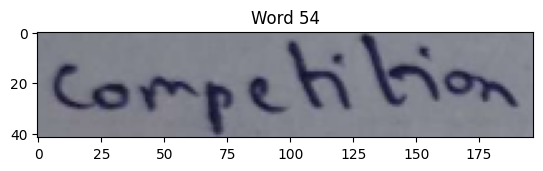

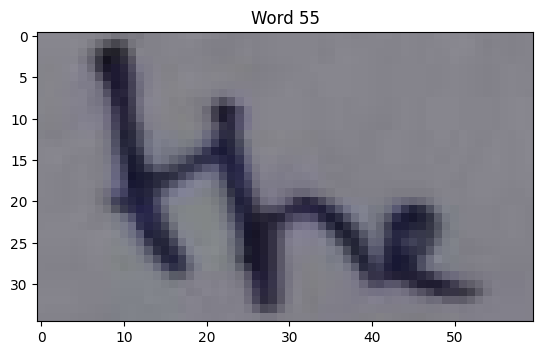

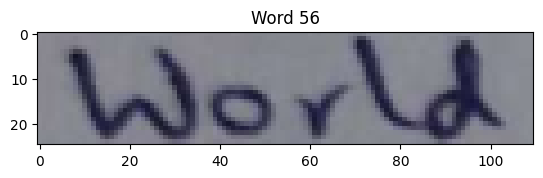

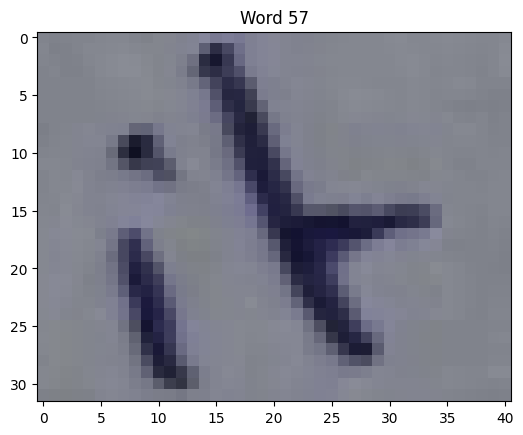

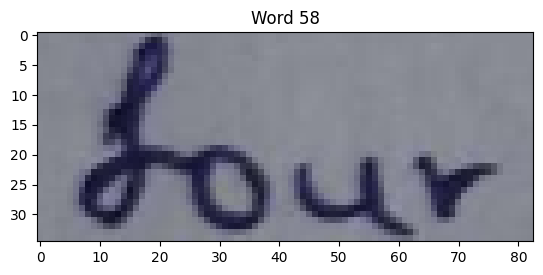

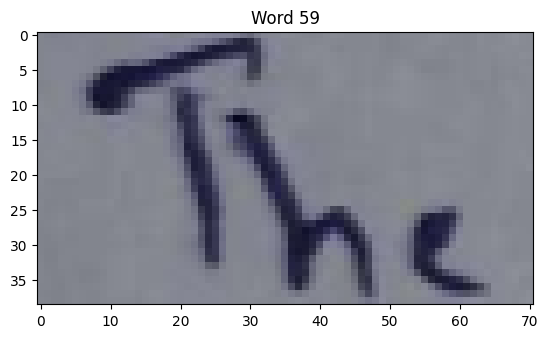

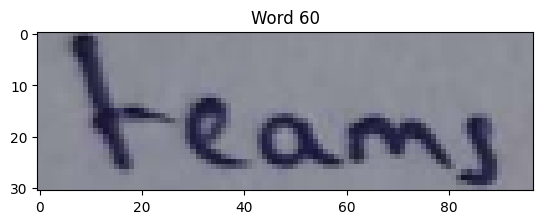

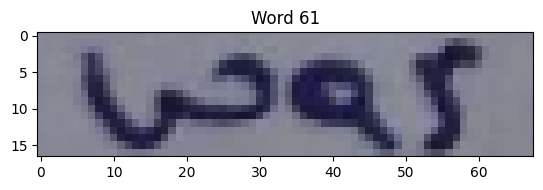

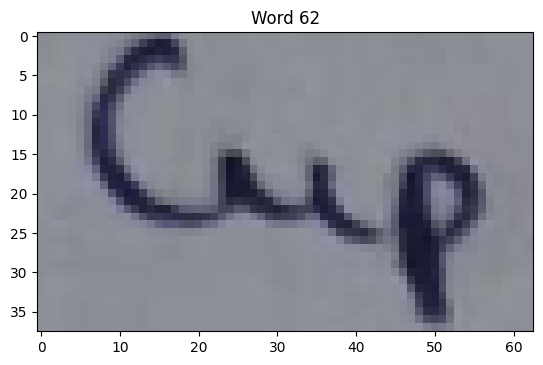

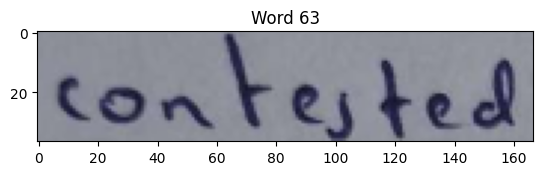

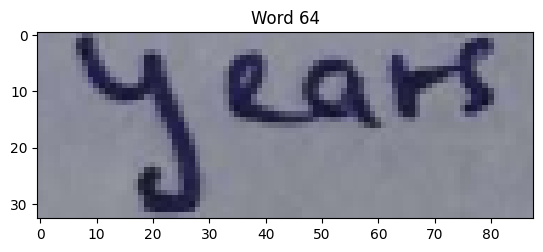

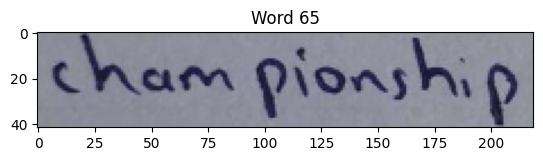

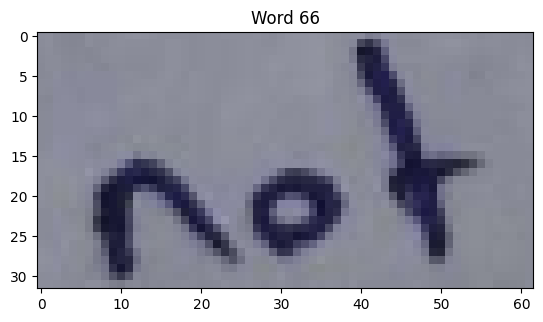

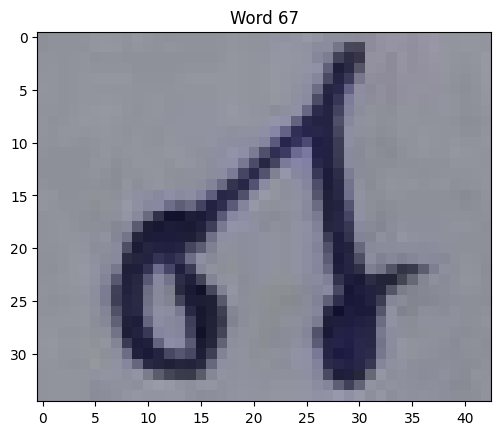

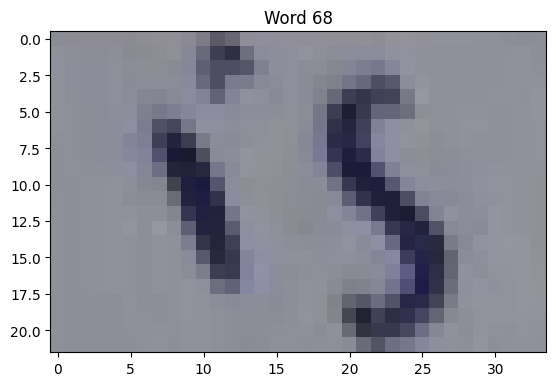

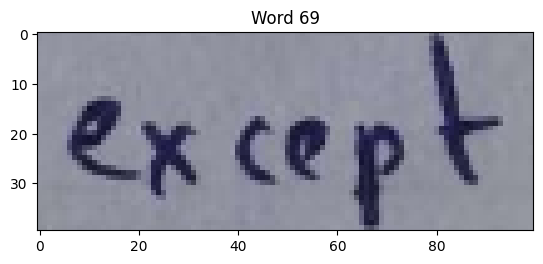

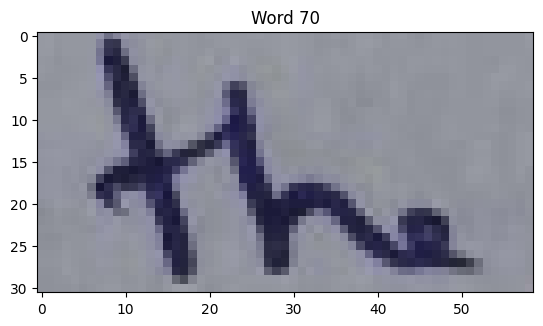

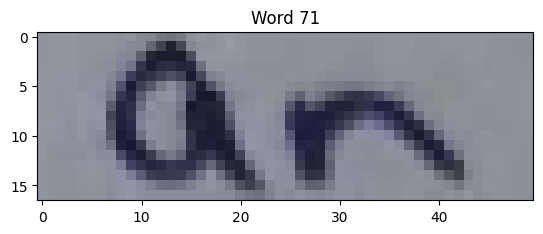

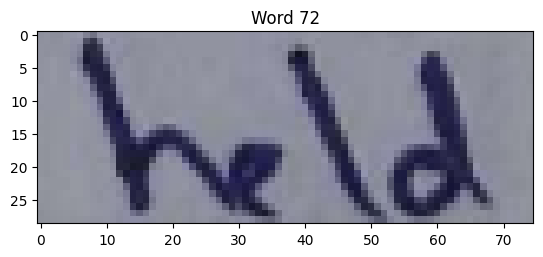

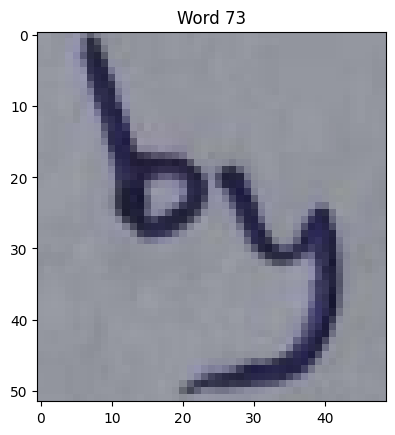

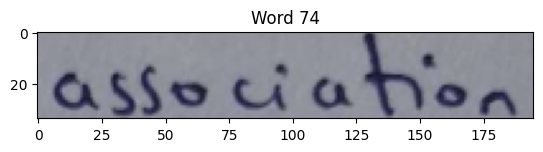

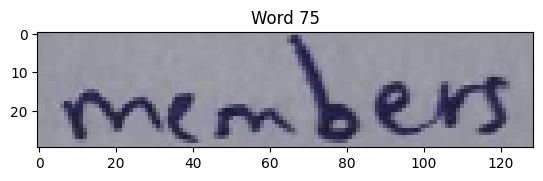

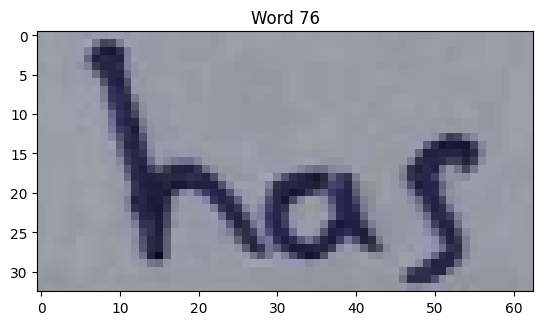

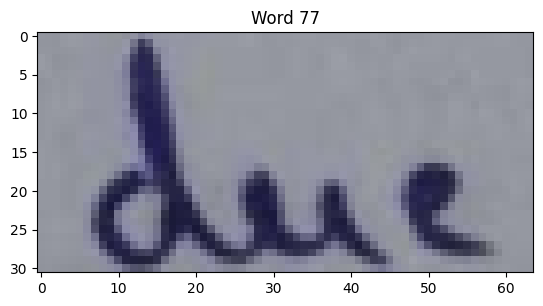

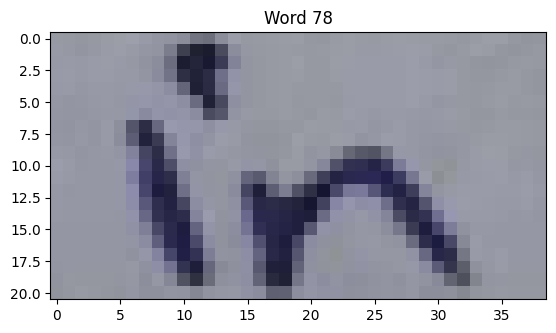

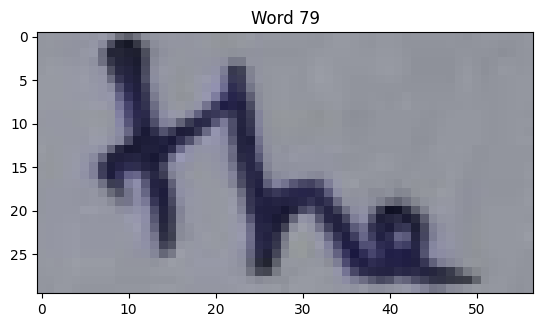

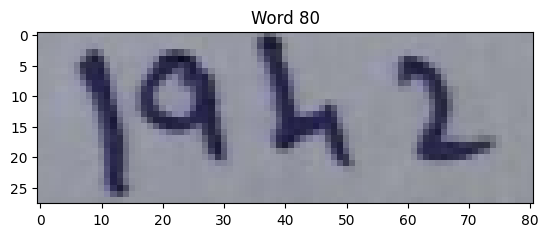

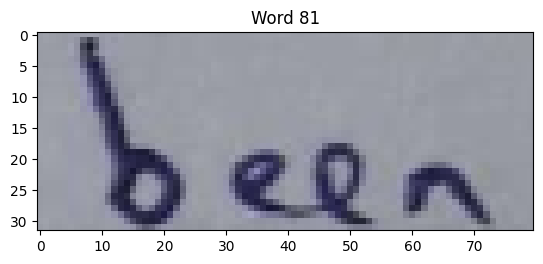

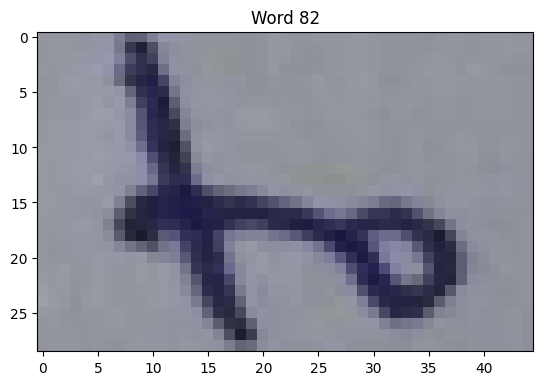

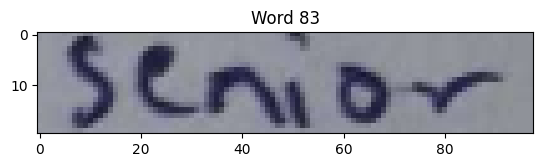

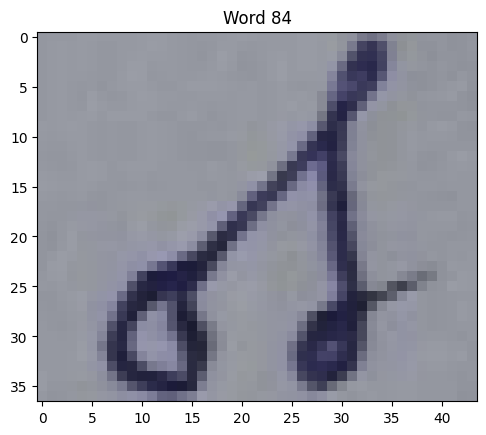

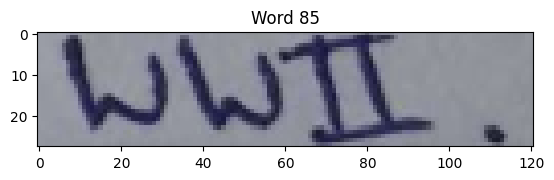

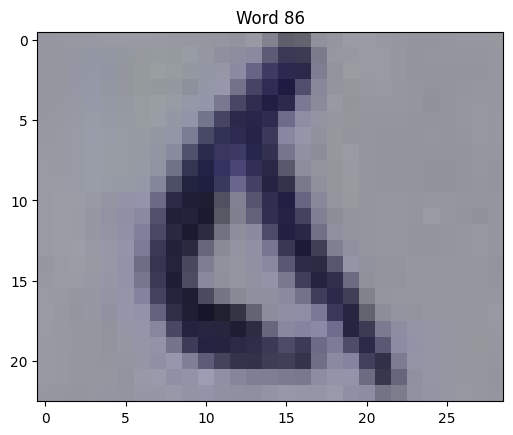

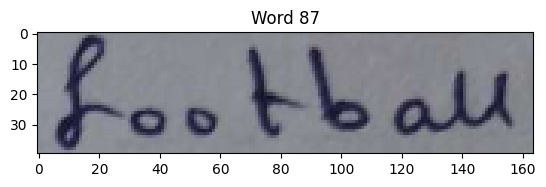

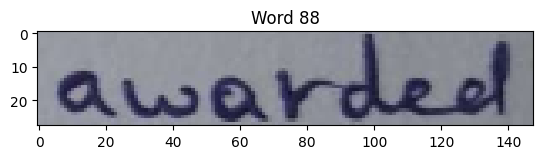

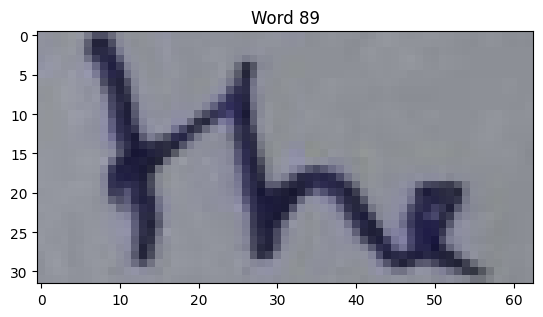

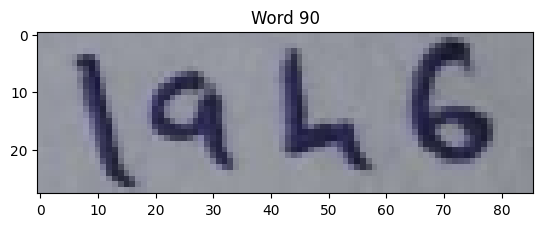

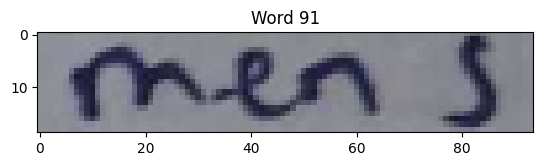

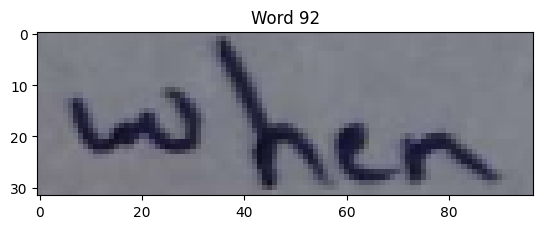

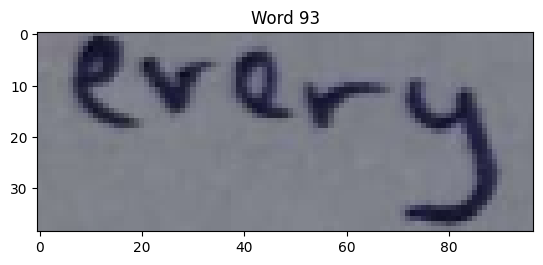

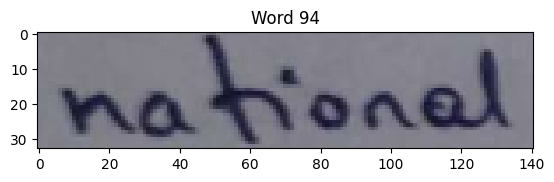

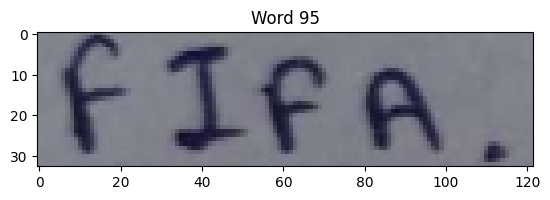

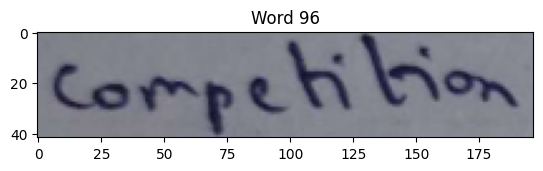

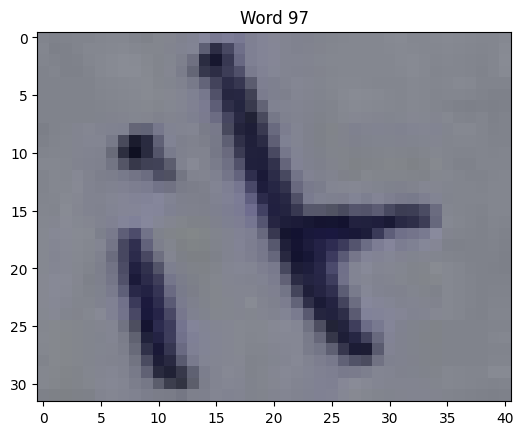

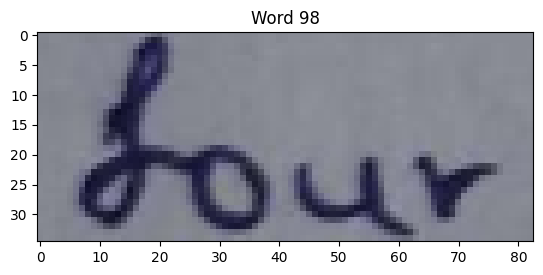

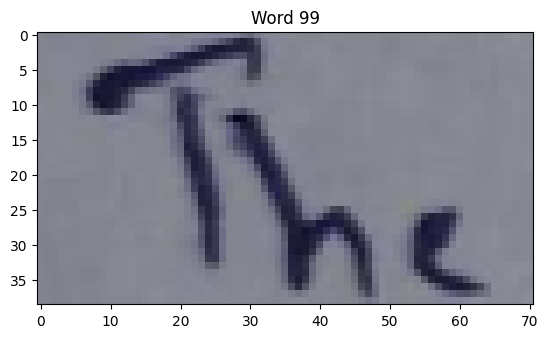

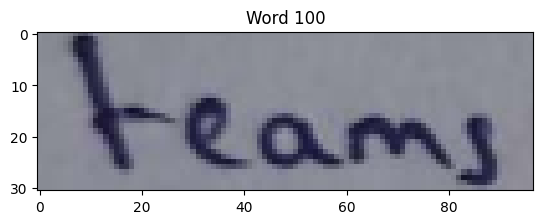

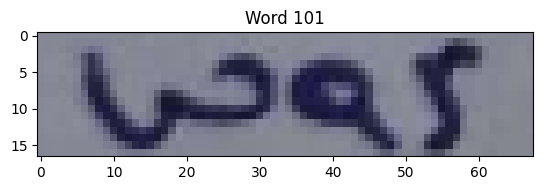

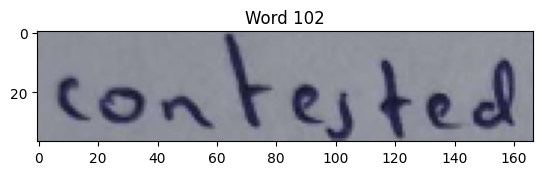

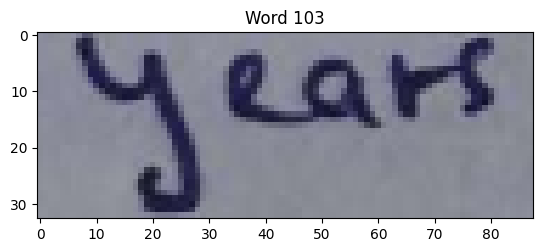

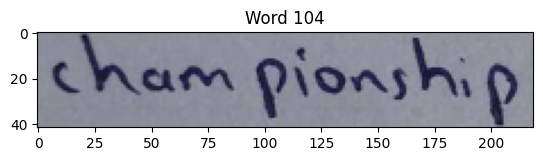

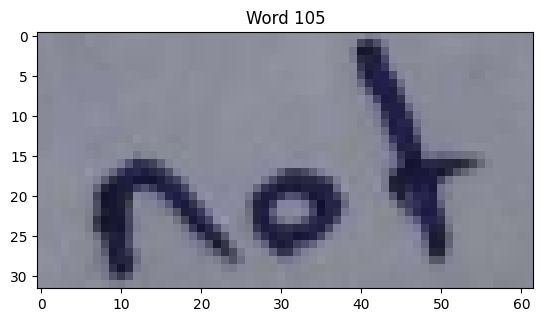

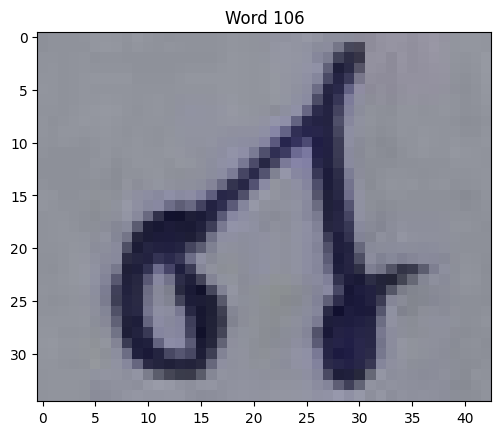

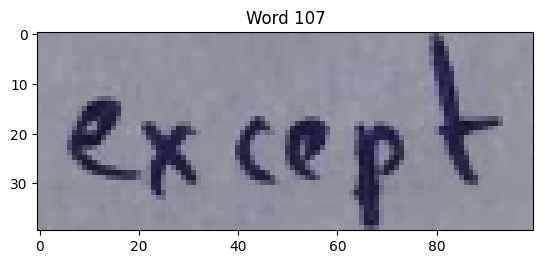

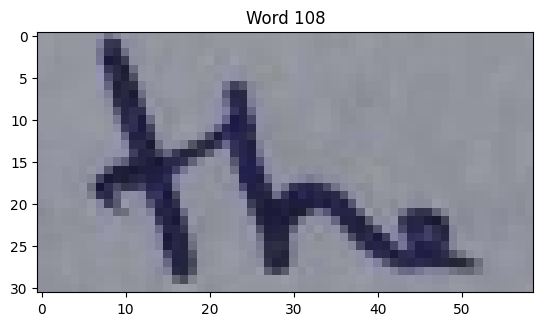

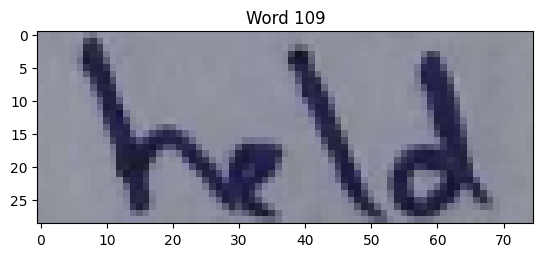

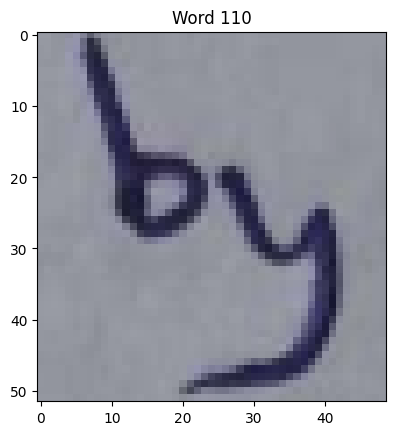

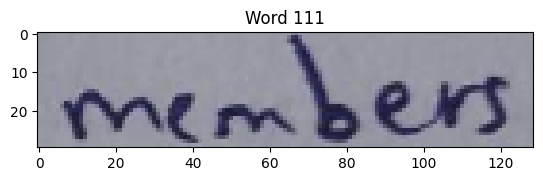

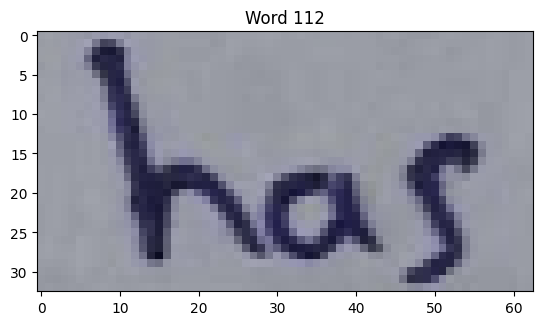

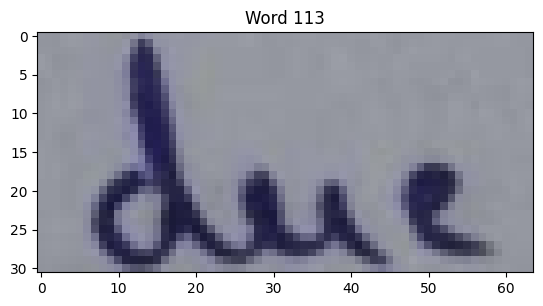

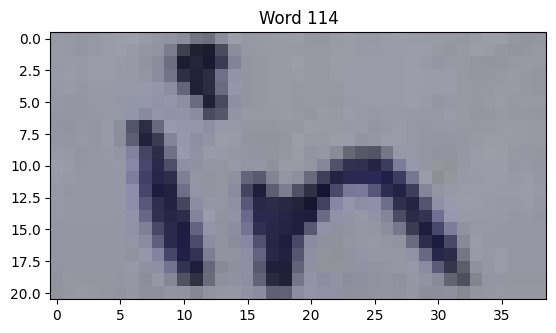

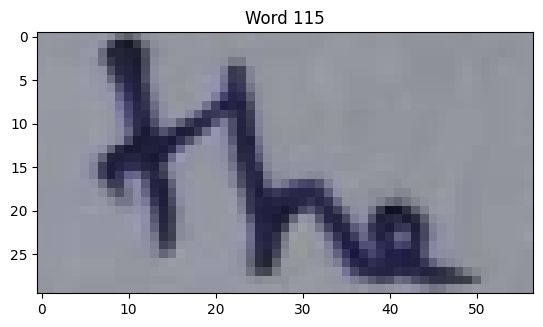

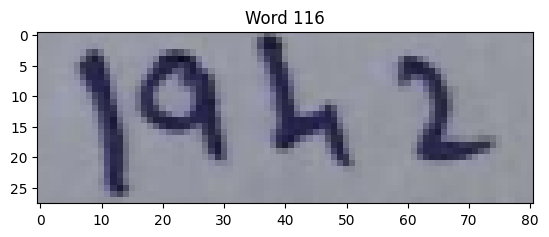

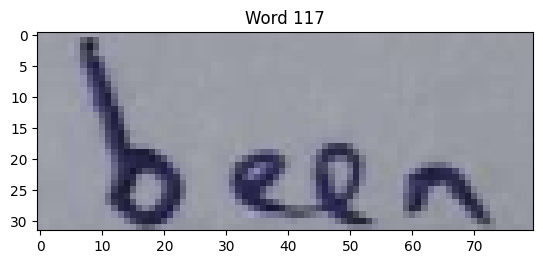

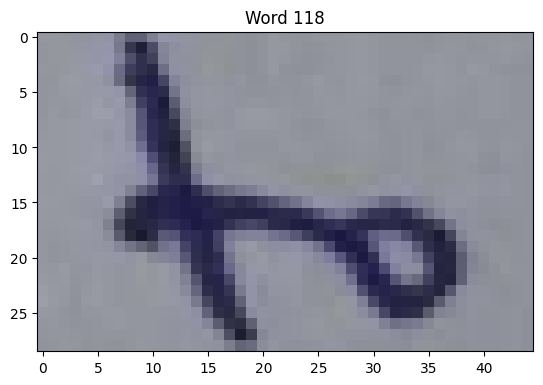

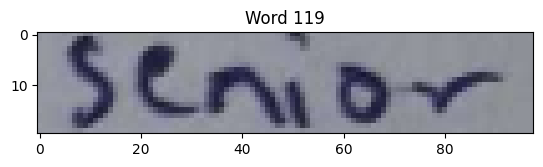

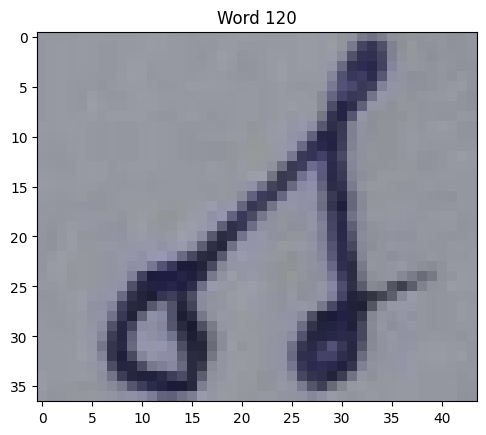

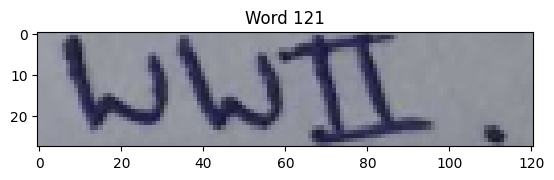

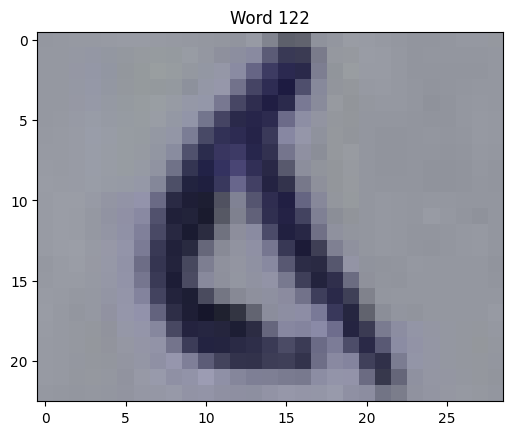

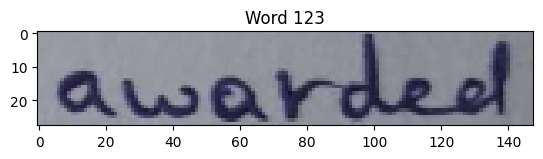

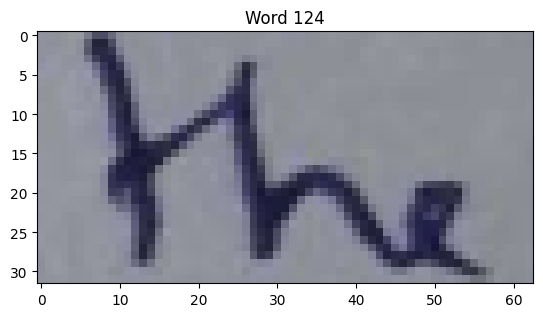

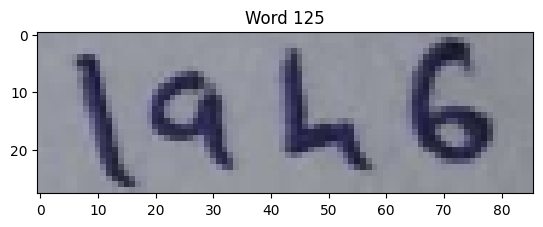

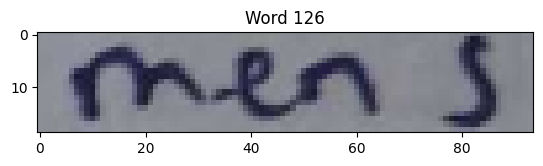

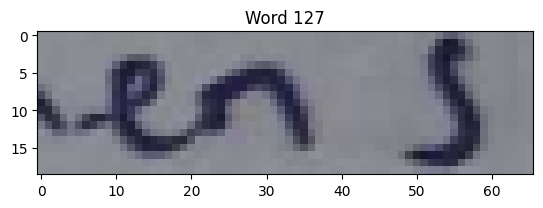

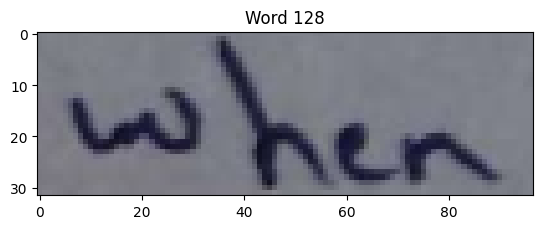

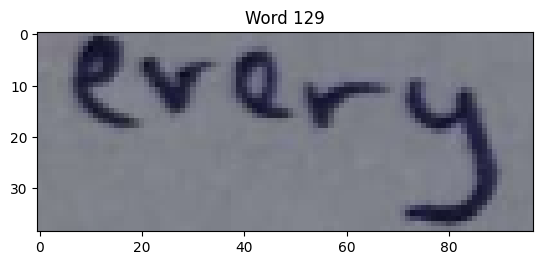

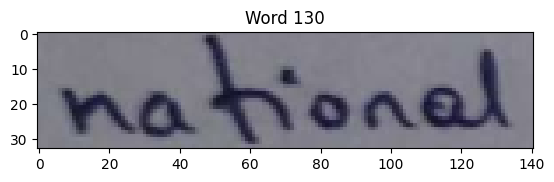

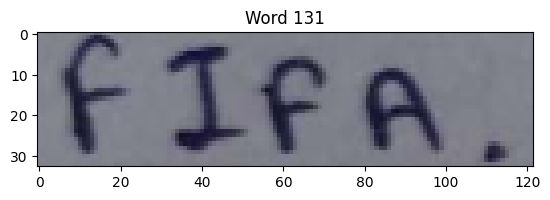

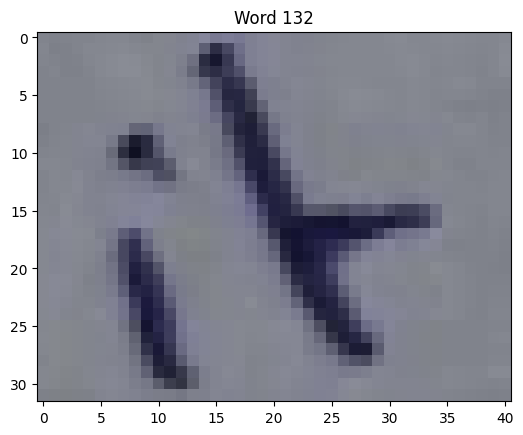

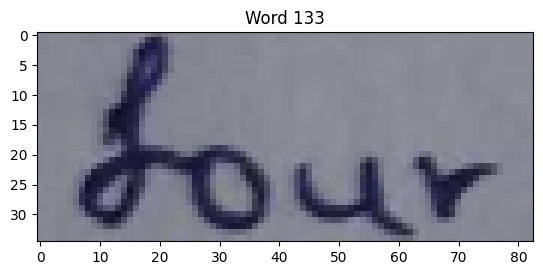

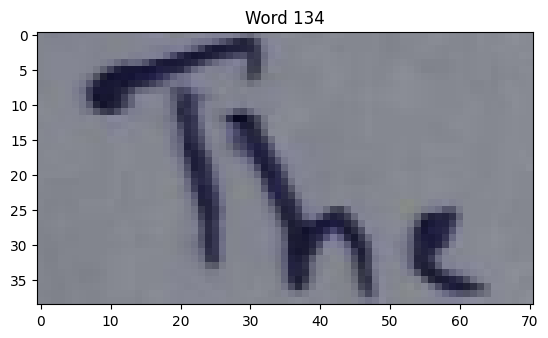

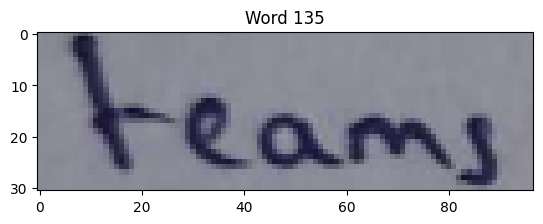

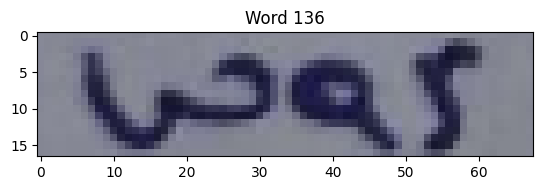

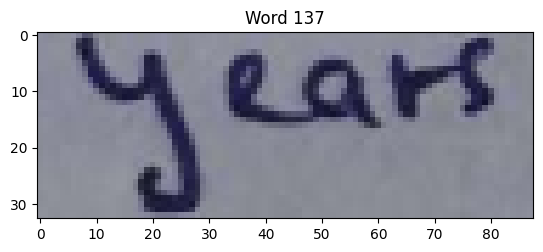

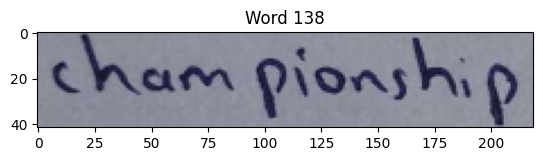

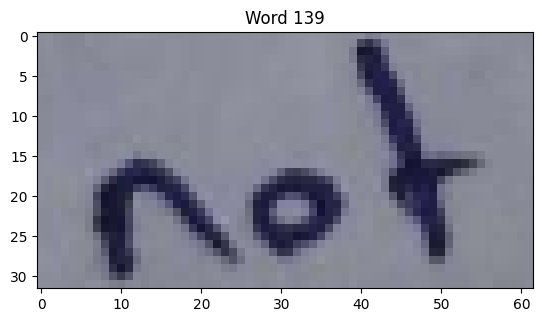

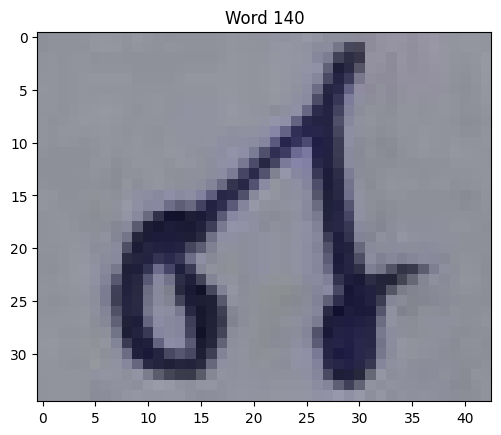

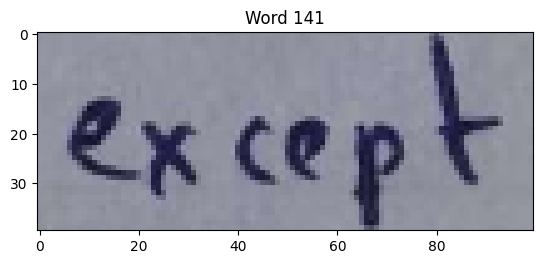

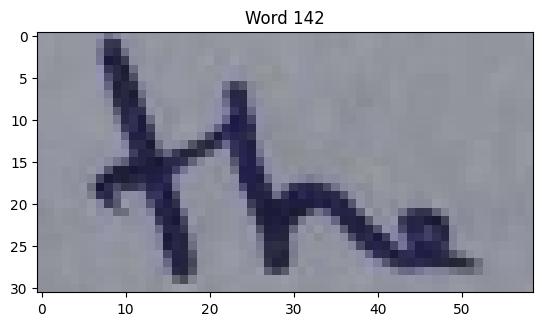

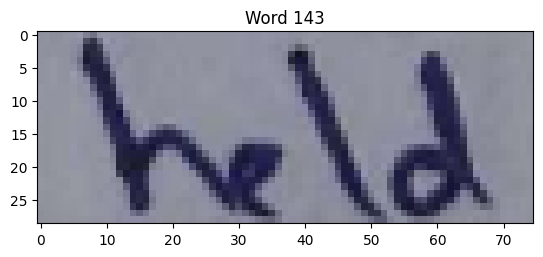

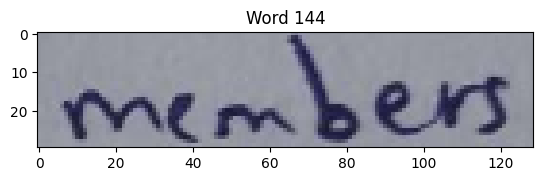

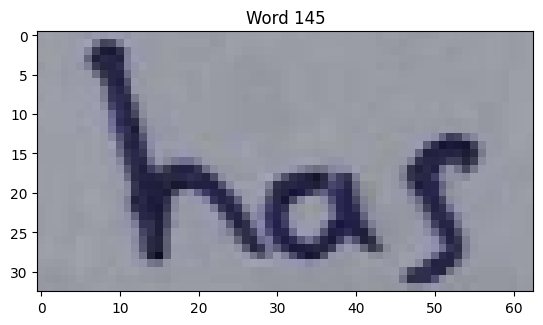

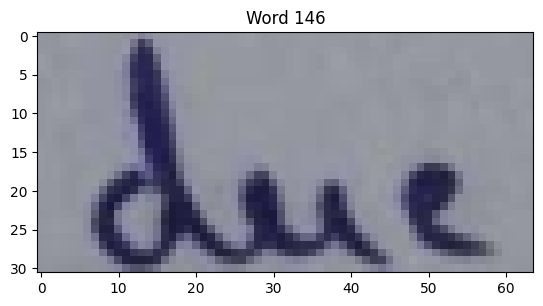

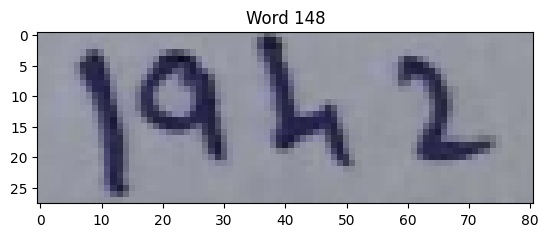

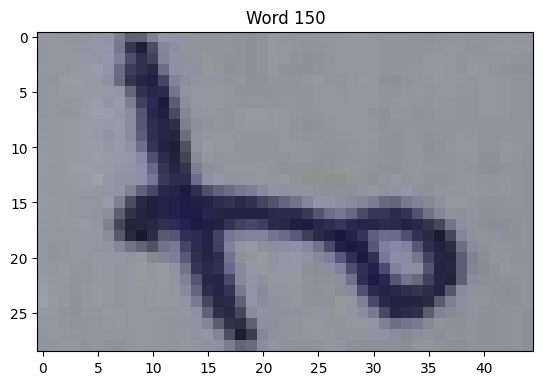

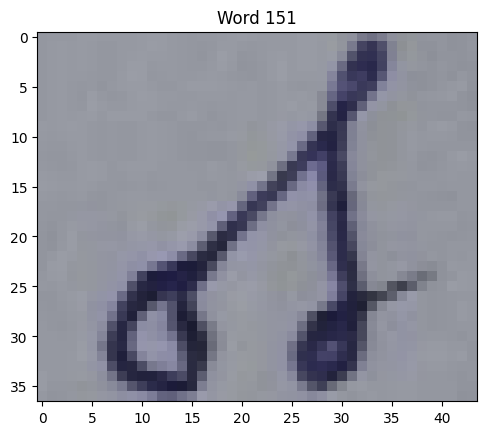

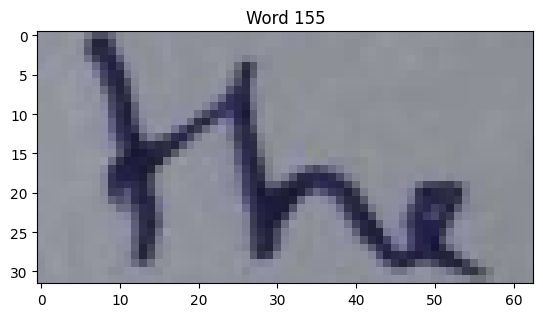

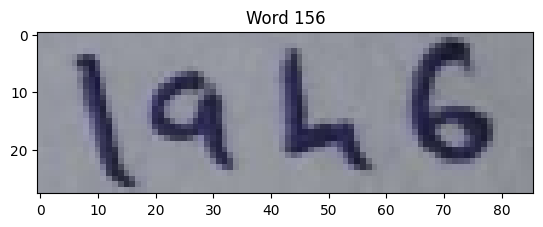

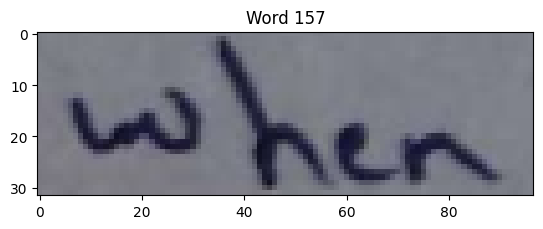

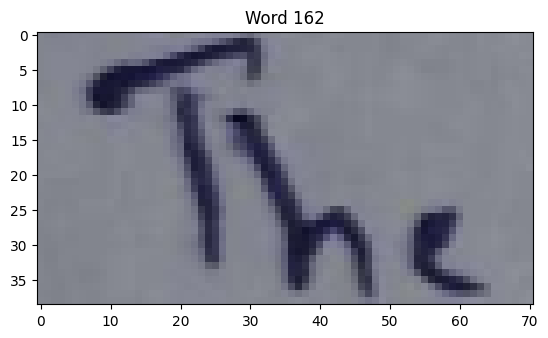

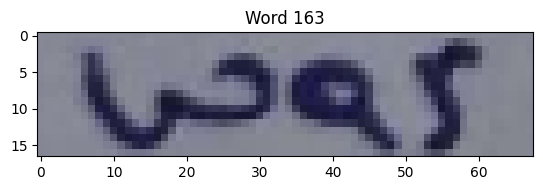

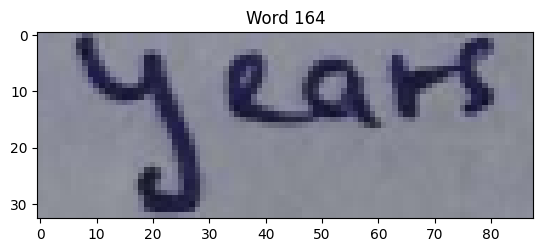

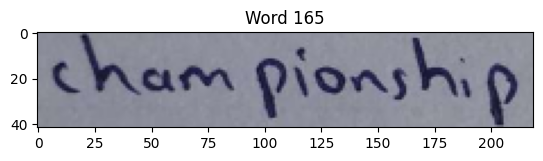

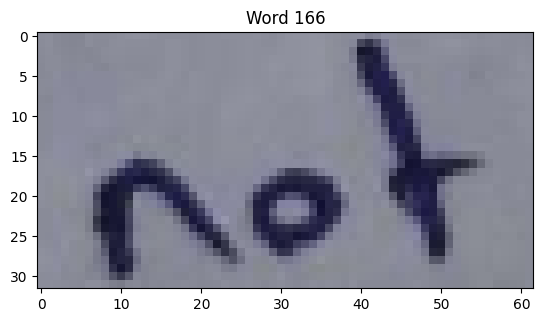

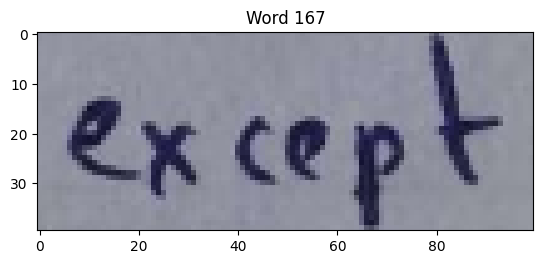

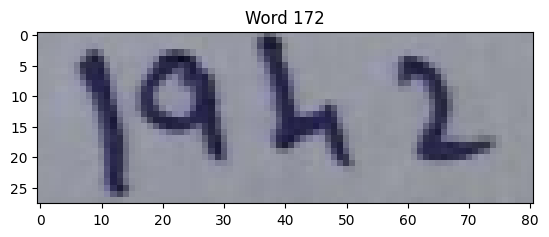

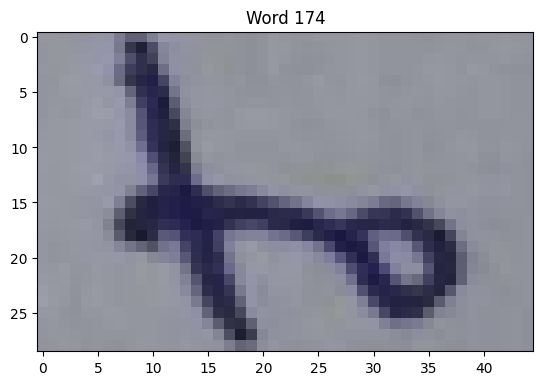

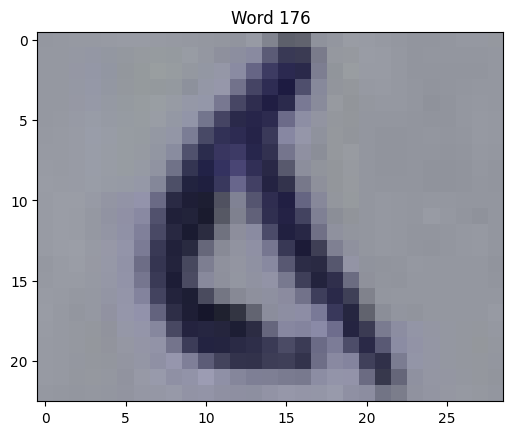

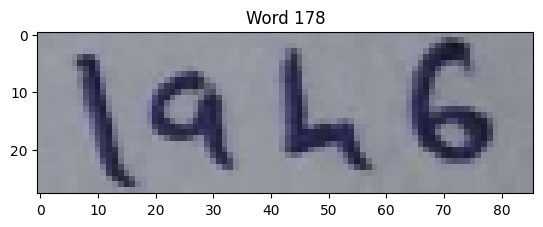

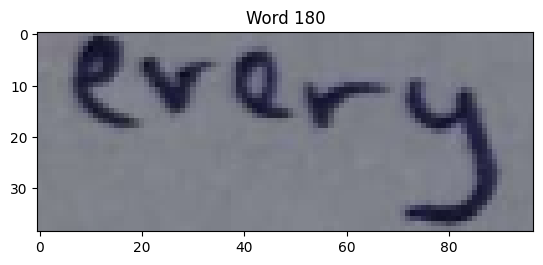

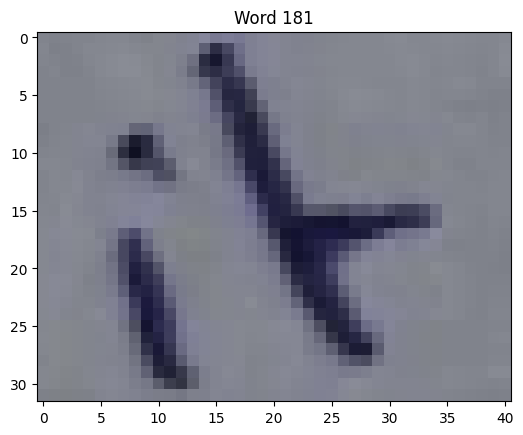

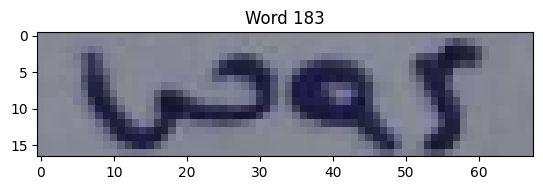

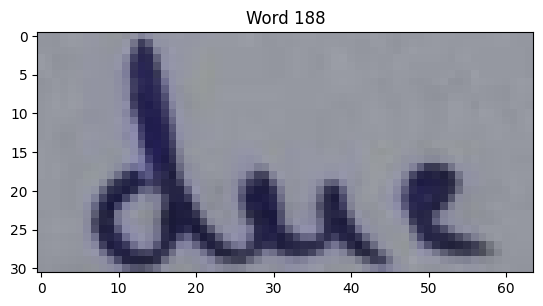

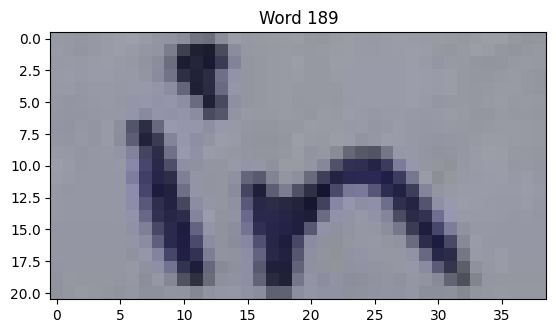

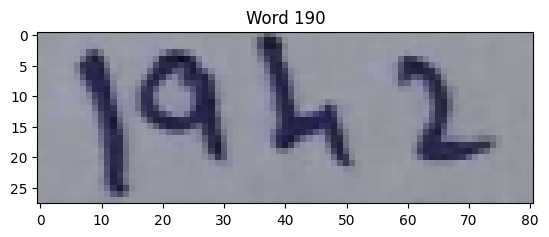

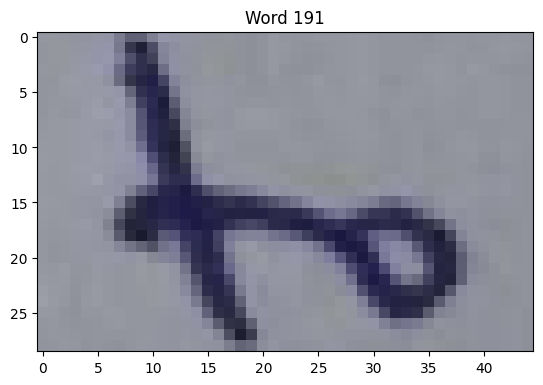

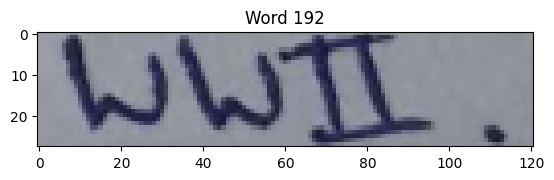

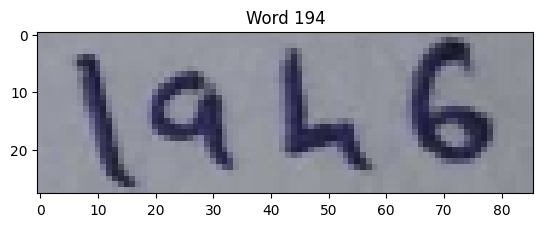

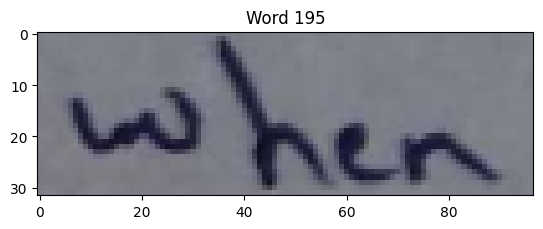

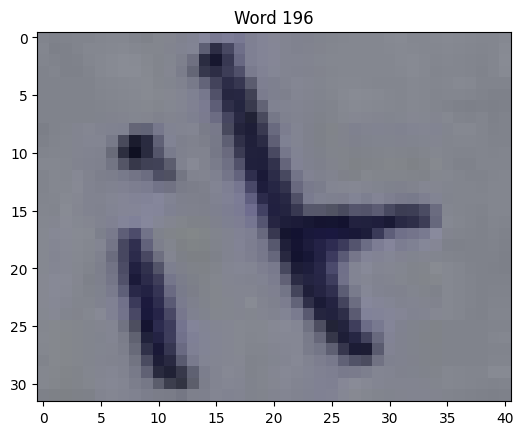

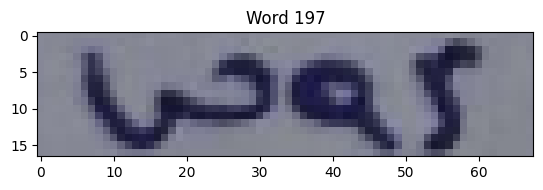

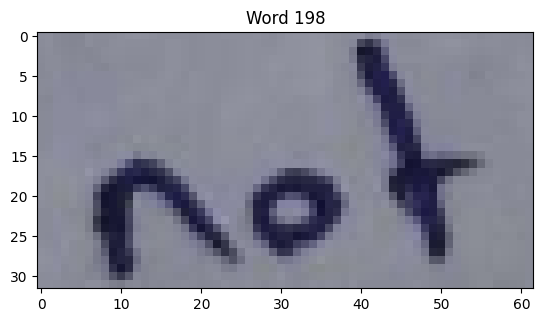

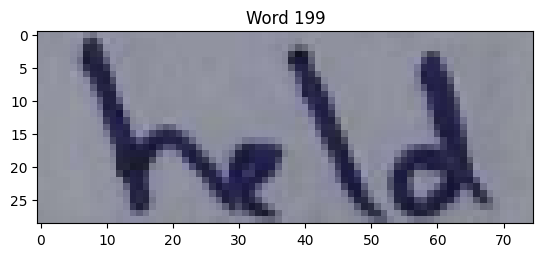

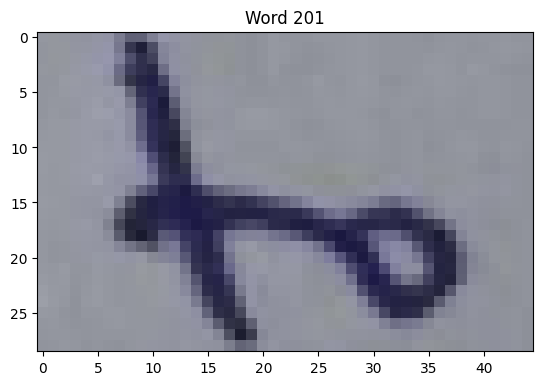

In [ ]:
    for i, word in enumerate(words_list):
        roi = img[word[1]:word[3], word[0]:word[2]]

        # Display the image
        plt.figure()
        plt.imshow(roi)
        plt.title(f'Word {i+1}')
        plt.show()

# Importing the model

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### **If you have a single word**

In [ ]:
from PIL import Image

# Path to the image file
file_path = "/content/t2.jpg"

# Open the image file
image = Image.open(file_path).convert("RGB")

pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print(generated_text)

FileNotFoundError: [Errno 2] No such file or directory: '/content/t2.jpg'

## **If you have a array of words**

In [ ]:
from PIL import Image

In [ ]:
generated_words = []

for i, word in enumerate(words_list):
    # Crop each word and convert it to an image
    word_image = Image.fromarray(img[word[1]:word[3], word[0]:word[2]])

    # Process the image using the TrOCR model
    pixel_values = processor(images=word_image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Add the generated text to the list
    generated_words.append(generated_text)

# Print the list of generated words
print(generated_words)

['the', 'when', 'every', 'national', 'fifa.', 'competition.', 'the', 'fifa', 'world', 'it', 'four', 'the', 'teamy', 'woap', 'world', 'cup', 'contested', 'years', 'championship', 'not', 'of', 'is', 'cup', 'except', 'the', 'an', 'held', 'by', 'often', 'association.', 'members', 'has', 'dune', 'jin', 'the', 'simply', '1942', 'been', 'to', 'senior.', 'of', 'wwiti.', 'cl', 'football', 'called', 'awards', 'the', 'laho', 'rmong', 'when', 'every', 'national', 'fifa.', 'competition.', 'the', 'world', 'it', 'four', 'the', 'teamy', 'woap', 'cup', 'contested', 'years', 'championship', 'not', 'of', 'is', 'except', 'the', 'an', 'held', 'by', 'association.', 'members', 'has', 'dune', 'jin', 'the', '1942', 'been', 'to', 'senior.', 'of', 'wwiti.', 'cl', 'football', 'awarded', 'the', 'laho', 'rmong', 'when', 'every', 'national', 'fifa.', 'competition.', 'it', 'four', 'the', 'teamy', 'woap', 'contested', 'years', 'championship', 'not', 'of', 'except', 'the', 'held', 'by', 'members', 'has', 'dune', 'jin',

## **For array of lines**

In [ ]:
# List to store the generated text for each line
generated_lines = []

for i, line in enumerate(lines_list):
    # Crop each line and convert it to an image
    line_image = Image.fromarray(img[line[1]:line[3], line[0]:line[2]])

    # Process the image using the TrOCR model
    pixel_values = processor(images=line_image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Add the generated text to the list
    generated_lines.append(generated_text)

# Print the list of generated lines
print(generated_lines)

['The Fida World Cup often simply called', 'the World Cup is an association football', "competition contested by the senior men's", '0 0', 'national teams of the members of the', 'FIFA. The championship has been awarded', 'every four years except in 1962 & 1966', 'when it was not held due to WWII.']
